### **Nombre:** Andrés Felipe Riaño Quintanilla.
### **Cédula:** 1083928808.

# Laboratorio 04

**Librerías:**

In [1]:
import numpy as np
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D
import pandas as pd

**Clase:**

In [2]:
class gradient_descent():
    '''
    Clase que implementa el algoritmo de gradiente descendente para optimizar los parámetros de un modelo
    de ajuste lineal multivariado, calculando tanto la función de costo como su gradiente.

    Atributos:
    ----------
    y_vector: arreglo unidimensional de Numpy
        Almacena los valores de las etiquetas (y).
    x_vector: arreglo bidimensional de Numpy
        Matriz que almacena los valores de las características (x).
    m: número flotante de Python
        Es el número de datos.
    n: número flotante de Python
        Es el número de características. 
    X_matrix: arreglo bidimensional de Numpy
        Es la matriz X de tamaño (n+1)xm que almacena la información de x_vector y le añade una fila completa de unos.

    Métodos:
    --------
    __init__(self, y, x):
        Inicializa la clase con los parámetros dados.
    
    cost_function(self, theta):
        Obtiene la función de costo asociada a los valores de entrada.

    gradient(self, theta):
        Calcula el gradiente de la función de costo asociada a los valores de entrada.

    lin_reg(self, theta_0, aplha, iter):
        Encuentra los parámetros óptimos de la regresión lineal con el método del gradiente descendente, ingresando una aproximación inicial.

    linear_params(self, alpha, iter):
        Encuentra los parámetros óptimos de la regresión lineal con el método del gradiente descendente, sin ingresar una aproximación inicial.
    '''

    def __init__(self, y, x):
        '''
        Inicializa la clase con los parámetros dados.

        Parámetros:
        -----------
        y_vector: arreglo unidimensional de Numpy
            Almacena los valores de las etiquetas (y).
        x_vector: arreglo bidimensional de Numpy
            Matriz que almacena los valores de las características (x).
        m: número flotante de Python
            Es el número de datos.
        n: número flotante de Python
            Es el número de características. 
        X_matrix: arreglo bidimensional de Numpy
            Es la matriz X de tamaño (n+1)xm que almacena la información de x_vector y le añade una fila completa de unos.
        '''
        self.y_vector = y
        self.x_vector = x
        self.m = x.shape[0]
        self.n = x.shape[1]
        self.X_matrix = np.concatenate((np.ones(self.m).reshape(1, -1), x.T), axis=0)

    def cost_function(self, theta):
        '''
        Calcula la función de costo para un vector theta determinado.

        Parámetros:
        -----------
        theta: arreglo unidimensional de Numpy
            Vector con los valores de theta que se van a evaluar en la función de costo.

        Retorna:
        --------
        J: número flotante de Python
            Función de costo evaluada en theta.
        '''
        J = 0.5*np.mean((theta@self.X_matrix - self.y_vector)**2.)

        return J
    
    def gradient(self, theta):
        '''
        Calcula el gradiente de la función de costo para un vector theta determinado.

        Parámetros:
        -----------
        theta: arreglo unidimensional de Numpy
            Vector con los valores de theta que se van a evaluar en el gradiente de la función de costo.

        Retorna:
        --------
        dJ: arreglo unidimensional de Numpy
            Vector con los valores del gradiente de la función de costo evaluado en theta.

        '''
        dJ = (1/self.m)*((theta@self.X_matrix - self.y_vector)@self.X_matrix.T)

        return dJ
    
    def lin_reg(self, theta_0, alpha, iter):
        '''
        Encuentra los parámetros óptimos de la regresión lineal con el método del gradiente descendente, ingresando una aproximación inicial.

        Parámetros:
        -----------
        theta_0: arreglo unidimensional de Numpy
            Vector con la aproximación inidial.
        alpha: número flotante de Numpy
            Tasa de aprendizaje del algoritmo del gradiente descendente.
        iter: número entero de Numpy
            Número de iteraciones que realizará el algoritmo.
        
        Retorna:
        --------
        theta_ip1: arreglo unidimensional de Numpy
            Parámetros óptimos de la regresión lineal encontrados en las iteraciones ingresadas.
        '''
        theta_i1 = lambda theta_i: theta_i - alpha*self.gradient(theta_i)
        theta_i = theta_0
        theta_ip1 = theta_i1(theta_i)

        for i in range(iter):
 
            theta_i = theta_ip1   
            theta_ip1 = theta_i1(theta_i)

        return theta_ip1

    def linear_params(self, alpha, iter):
        '''
        Encuentra los parámetros óptimos de la regresión lineal con el método del gradiente descendente, sin ingresar una aproximación inicial.

        Parámetros:
        -----------
        alpha: número flotante de Numpy
            Tasa de aprendizaje del algoritmo del gradiente descendente.
        iter: número entero de Numpy
            Número de iteraciones que realizará el algoritmo.
        
        Retorna:
        --------
        theta_0: arreglo unidimensional de Numpy
            Primer valor de theta generado aleatoriamente para dar inicio al algoritmo.
        theta_ip1: arreglo unidimensional de Numpy
            Parámetros óptimos de la regresión lineal encontrados en las iteraciones ingresadas.
        '''
        theta_0 = np.random.random(self.n+1)
        theta_ip1 = self.lin_reg(theta_0,alpha,iter)

        return theta_0, theta_ip1 

**Solución:**

**1.** Para simular un conjunto de características $x_1$ , $x_2$,..., $x_n$ trabajaremos en la primera parte con dos características de datos aleatorios que presentan un plano y mostraremos que los párametros optimizados se corresponden con el valor esperado.

- Definir la ecuación  $y = 2.1*x_1 - 3.1*x_2$, y generar números aleatorios que pertenecen al plano. 

In [3]:
x1 = 2 * np.random.random(100) - 1
x2 = 2 * np.random.random(100) - 1
y = 2.1*x1 - 3.1*x2   #Los números aleatorios deben pertenecer al plano. También se podría hacer el ejercicio incluyendo una pequeña desviación a cada Y_i.

- Realizar un diagrama 3D de los puntos generados aleatoriamente. 

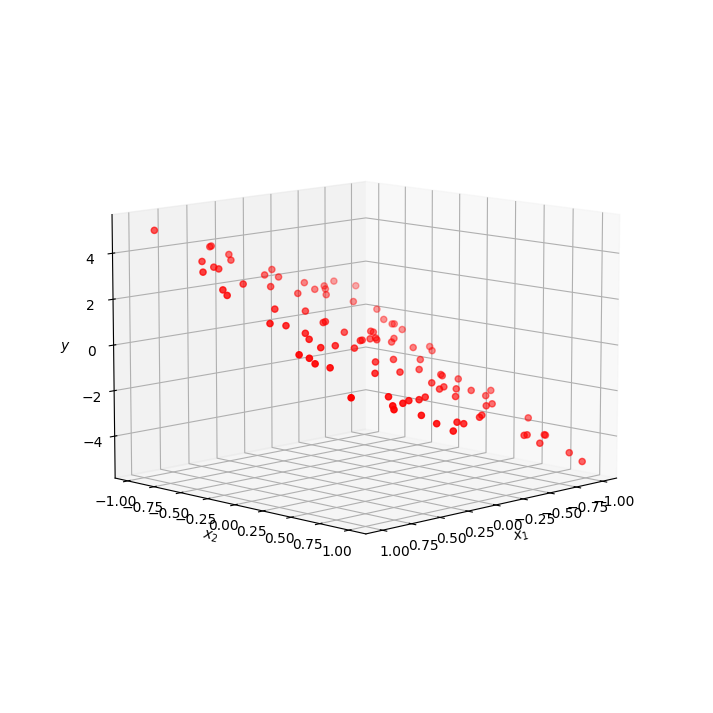

In [4]:
fig = plt.figure(figsize=(10,9))

ax = fig.add_subplot(111, projection='3d')
ax.scatter(x1, x2, y, c='r', marker='o')
ax.set_xlabel('$x_1$')
ax.set_ylabel('$x_2$')
ax.set_zlabel('$y$')
ax.view_init(elev= 10, azim=45)
ax.set_box_aspect(aspect=None, zoom=0.8)

plt.show()

**2.** Inicializar conjunto de parámetros $\Theta$ de manera aleatoria.

En el método `linear_params` de la clase `gradient_descent` se genera un conjunto aleatorio de parámetros $\Theta$ como sigue:

```python
theta_0 = np.random.random(self.n+1)   #La dimensión del vector aleatorio es igual n+1.
```
Ahora hallemos el conjunto de parámetros $\Theta$ iniciales con el método `linear_params` de la clase `gradient_descent`.

In [5]:
#Dataframe con los datos.

Data = pd.DataFrame({'Y':y,'X_1':x1,'X_2':x2})
Data.head()

,Y,X_1,X_2
0,-2.172072,-0.356961,0.458856
1,-1.600571,-0.265227,0.336644
2,-0.097822,-0.763572,-0.485703
3,-0.331617,-0.504033,-0.234469
4,2.759557,0.994798,-0.216284


In [6]:
#Objeto A con toda la información del problema.

A = gradient_descent(Data.Y.to_numpy(),Data[['X_1','X_2']].to_numpy())

In [7]:
print('Aproximación inicial de theta:\n\n{}'.format(A.linear_params(0.1,1000)[0]))

Aproximación inicial de theta:

[0.16908766 0.50817775 0.00830989]


**3.** Construir la matriz $\mathbb{X}$ con dimensiones $(n+1, m)$, m es el numero de datos de entrenamiento y n el número de caracteristicas.

En el atributo `X_matrix` de la clase `gradient_descent` se define la matriz $\mathbb{X}$ así:

```python
self.X_matrix = np.concatenate((np.ones(self.m).reshape(1, -1), x.T), axis=0)   #x es una matriz con las características.
```

Ahora hallemos la matriz $\mathbb{X}$ de este problema ejecutando la clase `gradient_descent`.

In [8]:
print('La matriz X es \n\n{}'.format(A.X_matrix))

La matriz X es 

[[ 1.          1.          1.          1.          1.          1.
   1.          1.          1.          1.          1.          1.
   1.          1.          1.          1.          1.          1.
   1.          1.          1.          1.          1.          1.
   1.          1.          1.          1.          1.          1.
   1.          1.          1.          1.          1.          1.
   1.          1.          1.          1.          1.          1.
   1.          1.          1.          1.          1.          1.
   1.          1.          1.          1.          1.          1.
   1.          1.          1.          1.          1.          1.
   1.          1.          1.          1.          1.          1.
   1.          1.          1.          1.          1.          1.
   1.          1.          1.          1.          1.          1.
   1.          1.          1.          1.          1.          1.
   1.          1.          1.          1.          1.      

**4.** Calcular la función de costo.

La función de costo se obtiene con el método `cost_function` de la clase `gradient_descent`, y funciona así:

```python
def cost_function(self, theta):
    '''
    Calcula la función de costo para un vector theta determinado.

    Parámetros:
    -----------
    theta: arreglo unidimensional de Numpy
        Vector con los valores de theta que se van a evaluar en la función de costo.

    Retorna:
    --------
    J: número flotante de Python
        Función de costo evaluada en theta.
    '''
    J = 0.5*np.mean((theta@self.X_matrix - self.y_vector)**2.)

    return J
```

In [9]:
print('Función de costo evaluada en theta = [1 2 3]: \n\n{}'.format(A.cost_function(np.array([1,2,3]))))

Función de costo evaluada en theta = [1 2 3]: 

6.867926021285246


**5.** Aplicar el gradiente descendente:

  - Encontrar el gradiente.
    $\nabla J$ = $\Lambda X.T$

El gradiente $\nabla J$ se obtiene con el método `gradient` de la clase `gradient_descent`, el cual funciona así:

```python

def gradient(self, theta):
    '''
    Calcula el gradiente de la función de costo para un vector theta determinado.

    Parámetros:
    -----------
    theta: arreglo unidimensional de Numpy
        Vector con los valores de theta que se van a evaluar en el gradiente de la función de costo.

    Retorna:
    --------
    dJ: arreglo unidimensional de Numpy
        Vector con los valores del gradiente de la función de costo evaluado en theta.

    '''
    dJ = (1/self.m)*((theta@self.X_matrix - self.y_vector)@self.X_matrix.T)

    return dJ
```

Ahora veamos un ejemplo de su ejecución.

In [10]:
print('Gradiente de la función de costo evaluada en theta = [1 2 3]: \n\n{}'.format(A.gradient(np.array([1,2,3]))))

Gradiente de la función de costo evaluada en theta = [1 2 3]: 

[ 1.16994238 -0.1745415   2.05712385]


  - Actualizar los nuevos parametros: 
    $\Theta_{n+1}=\Theta_{n}-\alpha\nabla J$

La actualización de los nuevos parámetros se encuentra implícita en el método `lin_reg` de la clase `gradient_descent`:

```python 
def lin_reg(self, theta_0, alpha, iter):
    '''
    Encuentra los parámetros óptimos de la regresión lineal con el método del gradiente descendente, ingresando una aproximación inicial.

    Parámetros:
    -----------
    theta_0: arreglo unidimensional de Numpy
        Vector con la aproximación inidial.
    alpha: número flotante de Numpy
        Tasa de aprendizaje del algoritmo del gradiente descendente.
    iter: número entero de Numpy
        Número de iteraciones que realizará el algoritmo.
        
    Retorna:
    --------
    theta_ip1: arreglo unidimensional de Numpy
        Parámetros óptimos de la regresión lineal encontrados en las iteraciones ingresadas.
    '''
    theta_i1 = lambda theta_i: theta_i - alpha*self.gradient(theta_i)   #Esta función es la que se encarga de actualizar los parámetros.
    theta_i = theta_0
    theta_ip1 = theta_i1(theta_i)

    for i in range(iter):
 
        theta_i = theta_ip1   
        theta_ip1 = theta_i1(theta_i)   #Aquí es dónde se actualizan en cada ciclo los diferentes valores de theta.

    return theta_ip1
```



**6.** Iterar para encontrar los valores $\Theta$ que se ajustan el plano. 

Los parámetros buscados se encuentran con el método `linear_params` de la clase `gradient_descent`:

```python
def linear_params(self, alpha, iter):
    '''
    Encuentra los parámetros óptimos de la regresión lineal con el método del gradiente descendente, sin ingresar una aproximación inicial.

    Parámetros:
    -----------
    alpha: número flotante de Numpy
        Tasa de aprendizaje del algoritmo del gradiente descendente.
    iter: número entero de Numpy
        Número de iteraciones que realizará el algoritmo.
        
    Retorna:
    --------
    theta_0: arreglo unidimensional de Numpy
        Primer valor de theta generado aleatoriamente para dar inicio al algoritmo.
    theta_ip1: arreglo unidimensional de Numpy
        Parámetros óptimos de la regresión lineal encontrados en las iteraciones ingresadas.
    '''
    theta_0 = np.random.random(self.n+1)
    theta_ip1 = self.lin_reg(theta_0,alpha,iter)   #Valor de los parámetros en la última iteración.

    return theta_0, theta_ip1 
```

Ejemplo de ejecución:

In [11]:
final_theta = A.linear_params(0.1,1000)[1]

print('Parámetros theta encontrados para una razón de aprendizaje alpha = 0.1 y 1000 iteraciones:\n\n{}'.format(final_theta))

Parámetros theta encontrados para una razón de aprendizaje alpha = 0.1 y 1000 iteraciones:

[ 1.86214518e-17  2.10000000e+00 -3.10000000e+00]


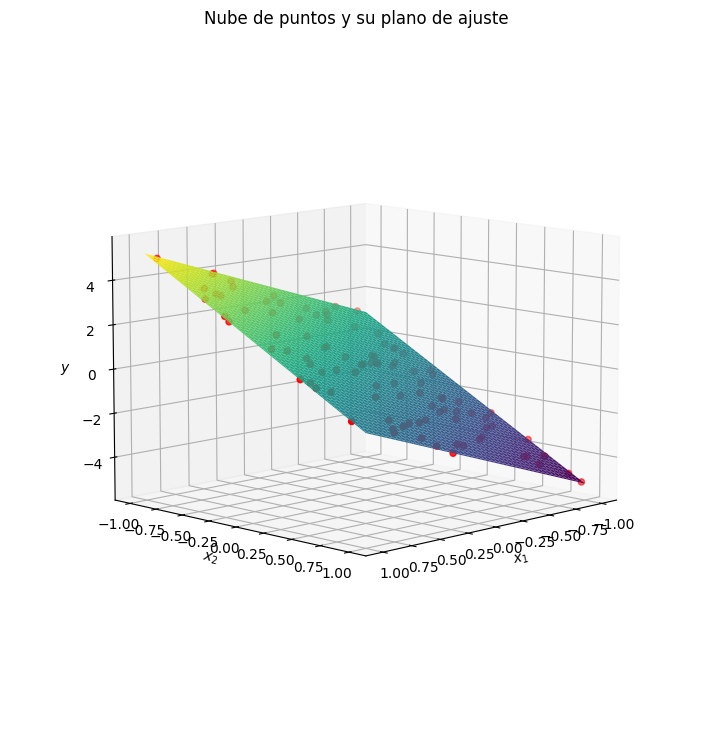

In [12]:
X1_ = np.linspace(-1,1,100)
X2_ = np.linspace(-1,1,100)
x_1, x_2 = np.meshgrid(X1_,X2_)
y_ = final_theta[0] + final_theta[1]*x_1 + final_theta[2]*x_2
 
fig = plt.figure(figsize=(10,9))

ax = fig.add_subplot(111, projection='3d')
ax.set_title('Nube de puntos y su plano de ajuste')
ax.plot_surface(x_1, x_2, y_, cmap = "viridis")
ax.scatter(x1, x2, y, c='r', marker='o')
ax.set_xlabel('$x_1$')
ax.set_ylabel('$x_2$')
ax.set_zlabel('$y$')
ax.view_init(elev= 10, azim=45)
ax.set_box_aspect(aspect=None, zoom=0.8)

plt.show()